In [1]:
import pandas as pd
import itertools
import math
import matplotlib.pyplot as plt
import random
import seaborn

In [2]:
number_rows = 1000

In [3]:
file = pd.read_csv("rockyousubset.csv", nrows=number_rows)

In [4]:
file['Data Length'] = file['name'].str.len()

In [5]:
file

,name,Data Length
0,4269815011,10
1,spider1g,8
2,ktheed,6
3,256082,6
4,cmt1662,7
...,...,...
995,10983,5
996,juani123,8
997,872853992,9
998,nomames11,9


In [6]:
L = file['Data Length']
N = 127 #number of symbols that can be typed (ascii table)

file['strength'] = L*(math.log(N))/math.log(2)

In [7]:
file['Data Length'] = file['Data Length'].sort_values()

In [8]:

file.sort_values(by=['Data Length'])
file.dropna()

,name,Data Length,strength
0,4269815011,10,69.886847
1,spider1g,8,55.909477
2,ktheed,6,41.932108
3,256082,6,41.932108
4,cmt1662,7,48.920793
...,...,...,...
995,10983,5,34.943423
996,juani123,8,55.909477
997,872853992,9,62.898162
998,nomames11,9,62.898162


(array([  1.,   0.,   0.,  16.,   0.,   0., 146.,   0.,   0., 174.,   0.,
          0., 217.,   0.,   0., 166.,   0.,   0., 129.,   0.,   0.,   0.,
         52.,   0.,   0.,  36.,   0.,   0.,  24.,   0.,   0.,  21.,   0.,
          0.,  10.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([ 27.95473875,  30.16782223,  32.38090572,  34.5939892 ,
         36.80707268,  39.02015617,  41.23323965,  43.44632314,
         45.65940662,  47.8724901 ,  50.08557359,  52.29865707,
         54.51174056,  56.72482404,  58.93790753,  61.15099101,
         63.36407449,  65.57715798,  67.79024146,  70.00332495,
         72.21640843,  74.42949191,  76.6425754 ,  78.85565888,
         81.06874237,  83.28182585,  85.49490933,  87.70799282,
         89.9210763 ,  92.13415979,  94.34724327,  96.56032676,
         98.77341024, 100.98649372, 103.19957721, 105.41266069,
        107.62

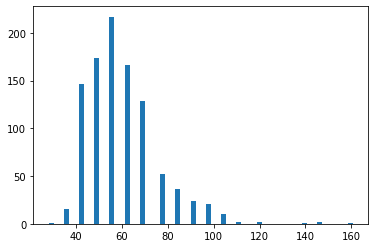

In [10]:
plt.hist(file['strength'], bins=60)

In [93]:
common_words = pd.read_csv("unigram_freq.csv")

2

In [95]:
list_of_bad_words = []

for i in common_words.index:
    if(len(str(common_words['name'][i])) <= 1):
        list_of_bad_words.append(i)
#         common_words.drop(common_words['name'][i])

In [100]:
common_words = common_words.drop(list_of_bad_words)


In [101]:
common_words

,name,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
5,in,8469404971
...,...,...
333328,gooek,12711
333329,gooddg,12711
333330,gooblle,12711
333331,gollgo,12711


In [102]:
list_of_matches = []

In [ ]:
#Calculate the list of matches with the most common words

for i in file.index:
    match = ""
    for j in common_words.index:
        if(str(common_words['name'][j]) in str(file['name'][i])):
            match += str(common_words['name'][j]) + ","
    
    list_of_matches.append(match[:-1])
            



In [ ]:
file.index

In [ ]:
list_of_matches

In [ ]:
len(list_of_matches)

In [108]:

for i in list_of_matches:
    comma = 0
    for j in list_of_matches[i]:
        if(list_of_matches[i][j] == ','):
            comma+=1
    print(comma)



TypeError: list indices must be integers or slices, not str

In [ ]:
file['matches'] = list_of_matches

In [ ]:
pd.set_option('display.max_rows', 1000)
file